### Notebook này thực hiện phân tích khám phá dữ liệu (EDA) cho bài toán dự báo tiến độ học tập của sinh viên.

#### 1. Setup và Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import sys

sys.path.append(str(Path.cwd().parent.parent))
from src.utils import set_seed

set_seed(42)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

from src.config import *
from src.data_loader import *
from src.utils import set_seed

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')


#### 2. Load Data

In [6]:
loader = DataLoader()
loader.load_raw_data()
admission_df = loader.admission_df
academic_df = loader.academic_df
print(f"Admission data: {admission_df.shape}")
print(f"Academic data: {academic_df.shape}")

Loading raw data...
Admission data loaded: (30217, 6)
Academic records loaded: (105726, 6)
Test data loaded: (16502, 3)
Admission data: (30217, 6)
Academic data: (105726, 6)


#### 3. Data Overview

In [ ]:
print(admission_df.info())
# admission_df.head()

In [10]:
df = academic_df.merge(admission_df, on="MA_SO_SV", how="left") 


In [ ]:
numerical_features = [
    "GPA",
    "CPA",
    "TC_DANGKY",
    "TC_HOANTHANH",
    "DIEM_TRUNGTUYEN",
    "DIEM_CHUAN"
]

df_num = df[numerical_features].dropna()
df_num.head()
expectation = df_num.mean()
expectation
variance = df_num.var()
variance
cov_matrix = df_num.cov()
cov_matrix


GPA                 2.290328
CPA                 1.962662
TC_DANGKY          19.438492
TC_HOANTHANH       15.609916
DIEM_TRUNGTUYEN    22.045015
DIEM_CHUAN         20.021152
dtype: float64

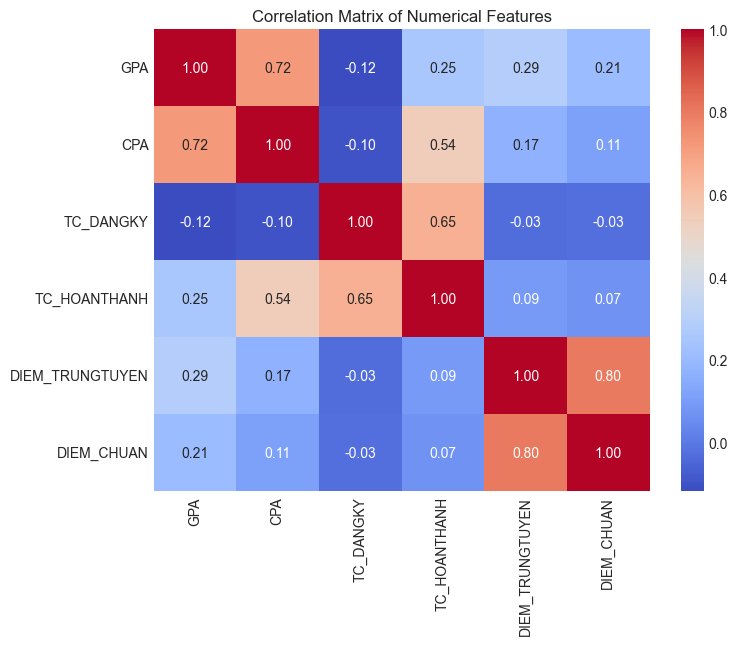

In [27]:
corr_matrix = df_num.corr()
corr_matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


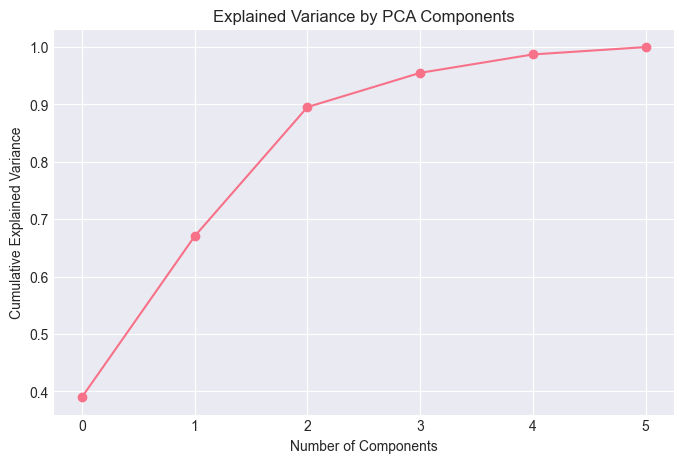

In [32]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio
plt.figure(figsize=(8,5))
plt.plot(
    np.cumsum(explained_variance_ratio),
    marker='o'
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

In [ ]:
pca_opt = PCA(n_components=0.9)  
X_pca_opt = pca_opt.fit_transform(X_scaled)
X_pca_opt.shape
pc_df = pd.DataFrame(
    pca_opt.components_,
    columns=df_num.columns,
    index=[f"PC{i+1}" for i in range(pca_opt.n_components_)]
)

pc_df



,GPA,CPA,TC_DANGKY,TC_HOANTHANH,DIEM_TRUNGTUYEN,DIEM_CHUAN
PC1,0.490714,0.502224,0.091946,0.391941,0.433150,0.396584
PC2,-0.012651,0.173639,0.549745,0.557598,-0.416338,-0.428038
PC3,-0.429545,-0.448144,0.537488,0.179265,0.355494,0.408966
PC4,0.710529,-0.414801,0.423067,-0.353400,0.029886,-0.135345


In [5]:
(academic_df['TC_DANGKY'] == 0).sum()

np.int64(0)

In [13]:
print(academic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105726 entries, 0 to 105725
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   MA_SO_SV      105726 non-null  object 
 1   HOC_KY        105726 non-null  object 
 2   CPA           105726 non-null  float64
 3   GPA           105726 non-null  float64
 4   TC_DANGKY     105726 non-null  int64  
 5   TC_HOANTHANH  105726 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ MB
None


In [ ]:
# academic_df.head()

#### 4. Statistical Summary

In [ ]:
admission_df.describe()
academic_df.describe()

#### 5. Missing Values Analysis

In [21]:
missing_admission = pd.DataFrame({
    "Column": admission_df.columns,
    "Missing Count": admission_df.isnull().sum(),
    "Missing %": (admission_df.isnull().sum() / len(admission_df) * 100).round(2)
})
missing_admission[missing_admission['Missing Count'] > 0]

,Column,Missing Count,Missing %


In [22]:
missing_academic = pd.DataFrame({
    "Column": academic_df.columns,
    "Missing Count": academic_df.isnull().sum(),
    "Missing %": (academic_df.isnull().sum() / len(academic_df) * 100).round(2)
})
missing_academic[missing_academic['Missing Count'] > 0]

,Column,Missing Count,Missing %


#### 6. Distribution Analysis

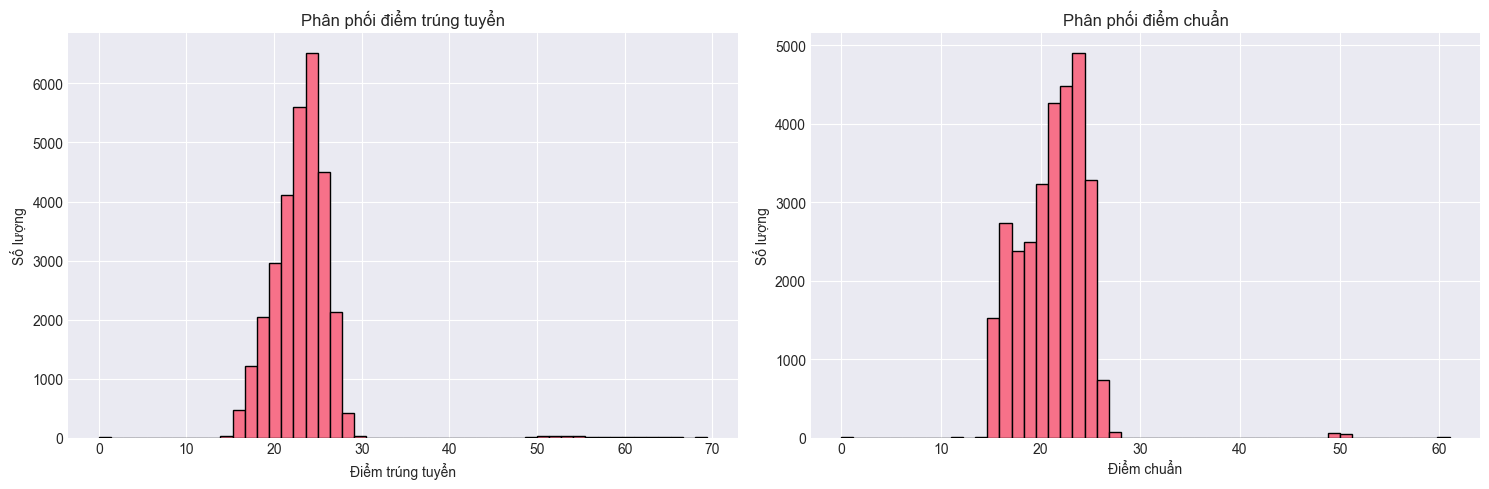

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(admission_df['DIEM_TRUNGTUYEN'].dropna(), bins=50, edgecolor='black')
axes[0].set_xlabel('Điểm trúng tuyển')
axes[0].set_ylabel('Số lượng')
axes[0].set_title('Phân phối điểm trúng tuyển')
axes[1].hist(admission_df['DIEM_CHUAN'].dropna(), bins=50, edgecolor='black')
axes[1].set_xlabel('Điểm chuẩn')
axes[1].set_ylabel('Số lượng')
axes[1].set_title('Phân phối điểm chuẩn')
plt.tight_layout()
plt.show()

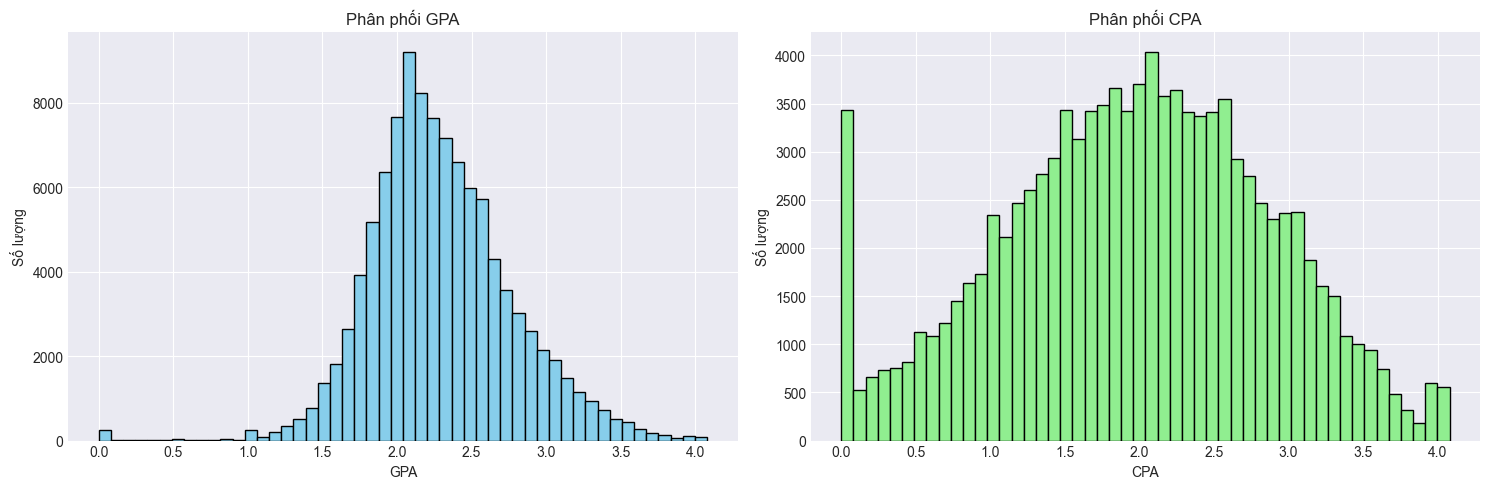

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(academic_df['GPA'].dropna(), bins=50, edgecolor='black', color='skyblue')
axes[0].set_xlabel('GPA')
axes[0].set_ylabel('Số lượng')
axes[0].set_title('Phân phối GPA')
axes[1].hist(academic_df['CPA'].dropna(), bins=50, edgecolor='black', color='lightgreen')
axes[1].set_xlabel('CPA')
axes[1].set_ylabel('Số lượng')
axes[1].set_title('Phân phối CPA')
plt.tight_layout()
plt.show()

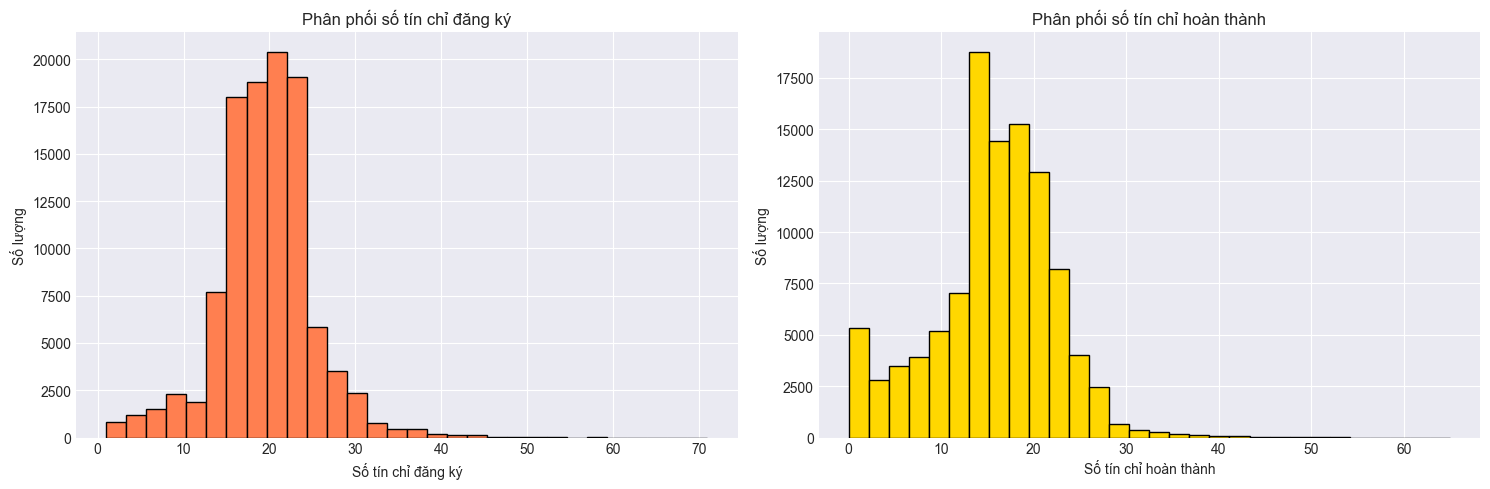

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(academic_df['TC_DANGKY'].dropna(), bins=30, edgecolor='black', color='coral')
axes[0].set_xlabel('Số tín chỉ đăng ký')
axes[0].set_ylabel('Số lượng')
axes[0].set_title('Phân phối số tín chỉ đăng ký')
axes[1].hist(academic_df['TC_HOANTHANH'].dropna(), bins=30, edgecolor='black', color='gold')
axes[1].set_xlabel('Số tín chỉ hoàn thành')
axes[1].set_ylabel('Số lượng')
axes[1].set_title('Phân phối số tín chỉ hoàn thành')
plt.tight_layout()
plt.show()

#### 7. Correlation Analysis

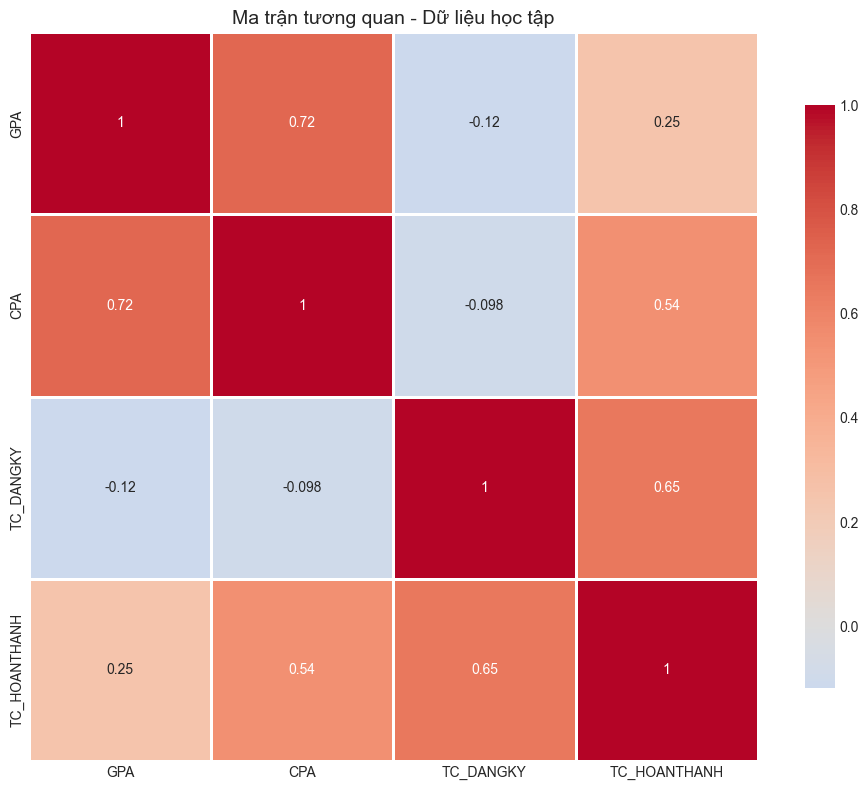

In [28]:
numeric_cols = ['GPA', 'CPA', 'TC_DANGKY', 'TC_HOANTHANH']
correlation_matrix = academic_df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Ma trận tương quan - Dữ liệu học tập', fontsize=14)
plt.tight_layout()
plt.show()

#### 8. Target Variable Analysis

Average completion rate: 80.36%
Median completion rate: 90.00%


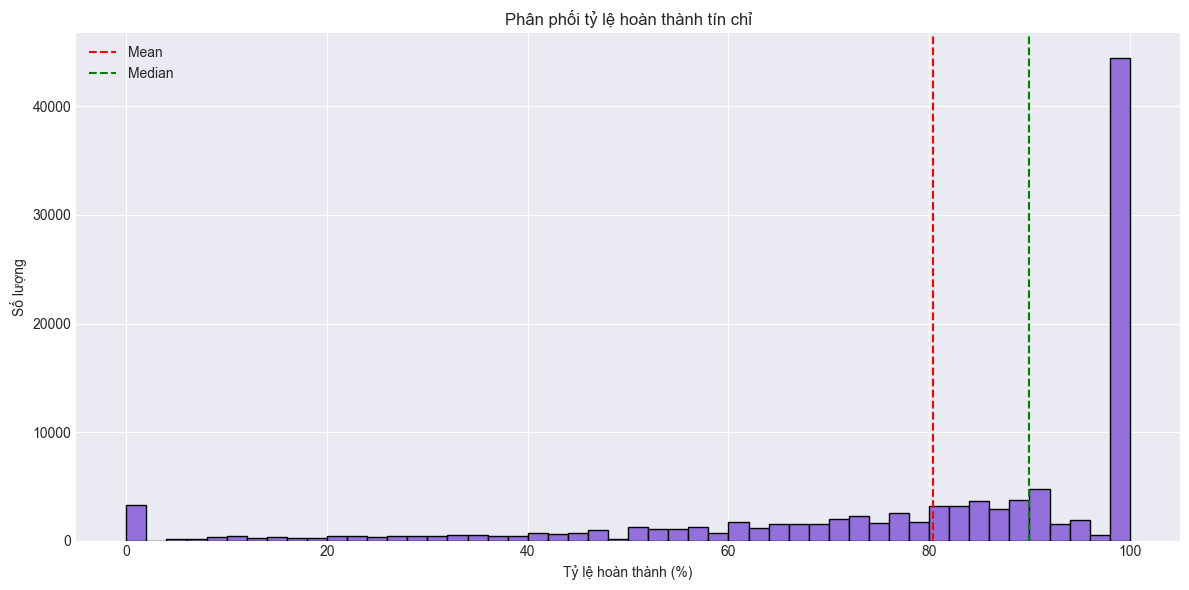

In [30]:
academic_df['completion_rate'] = (academic_df['TC_HOANTHANH'] / academic_df['TC_DANGKY'] * 100)
print(f"Average completion rate: {academic_df['completion_rate'].mean():.2f}%")
print(f"Median completion rate: {academic_df['completion_rate'].median():.2f}%")
plt.figure(figsize=(12, 6))
plt.hist(academic_df['completion_rate'].dropna(), bins=50, edgecolor='black', color='mediumpurple')
plt.xlabel('Tỷ lệ hoàn thành (%)')
plt.ylabel('Số lượng')
plt.title('Phân phối tỷ lệ hoàn thành tín chỉ')
plt.axvline(academic_df['completion_rate'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(academic_df['completion_rate'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.tight_layout()
plt.show()

#### 9. Categorical Features Analysis

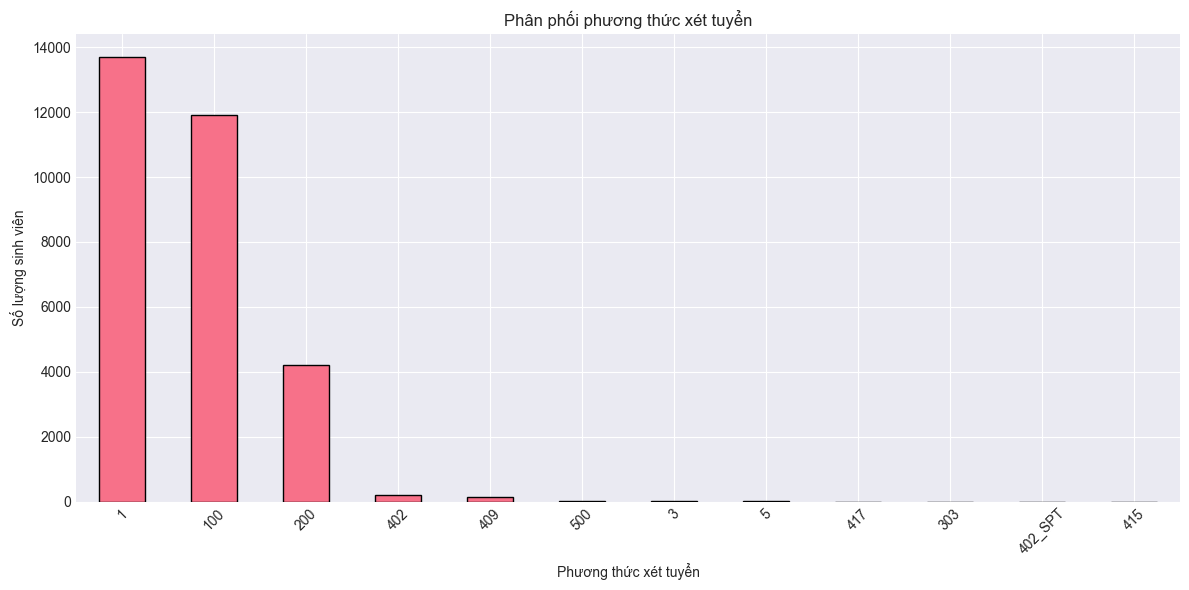

In [31]:
if 'PTXT' in admission_df.columns:
    ptxt_counts = admission_df['PTXT'].value_counts()
    plt.figure(figsize=(12, 6))
    ptxt_counts.plot(kind='bar', edgecolor='black')
    plt.xlabel('Phương thức xét tuyển')
    plt.ylabel('Số lượng sinh viên')
    plt.title('Phân phối phương thức xét tuyển')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

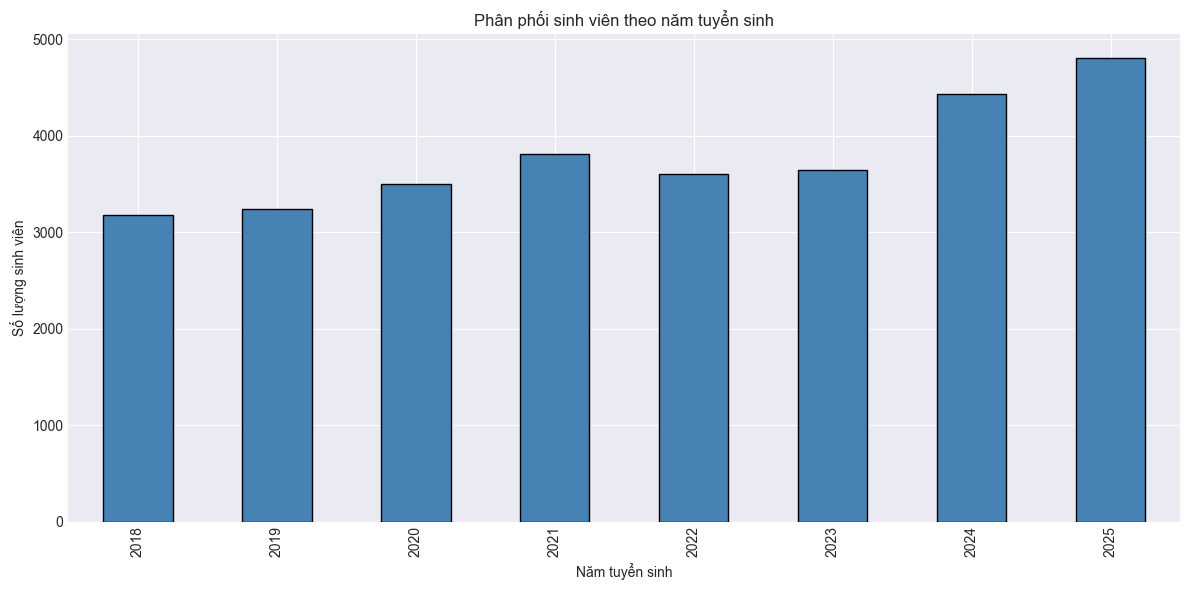

In [32]:
if 'NAM_TUYENSINH' in admission_df.columns:
    year_counts = admission_df['NAM_TUYENSINH'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    year_counts.plot(kind='bar', edgecolor='black', color='steelblue')
    plt.xlabel('Năm tuyển sinh')
    plt.ylabel('Số lượng sinh viên')
    plt.title('Phân phối sinh viên theo năm tuyển sinh')
    plt.tight_layout()
    plt.show()

#### 10. Time Series Analysis

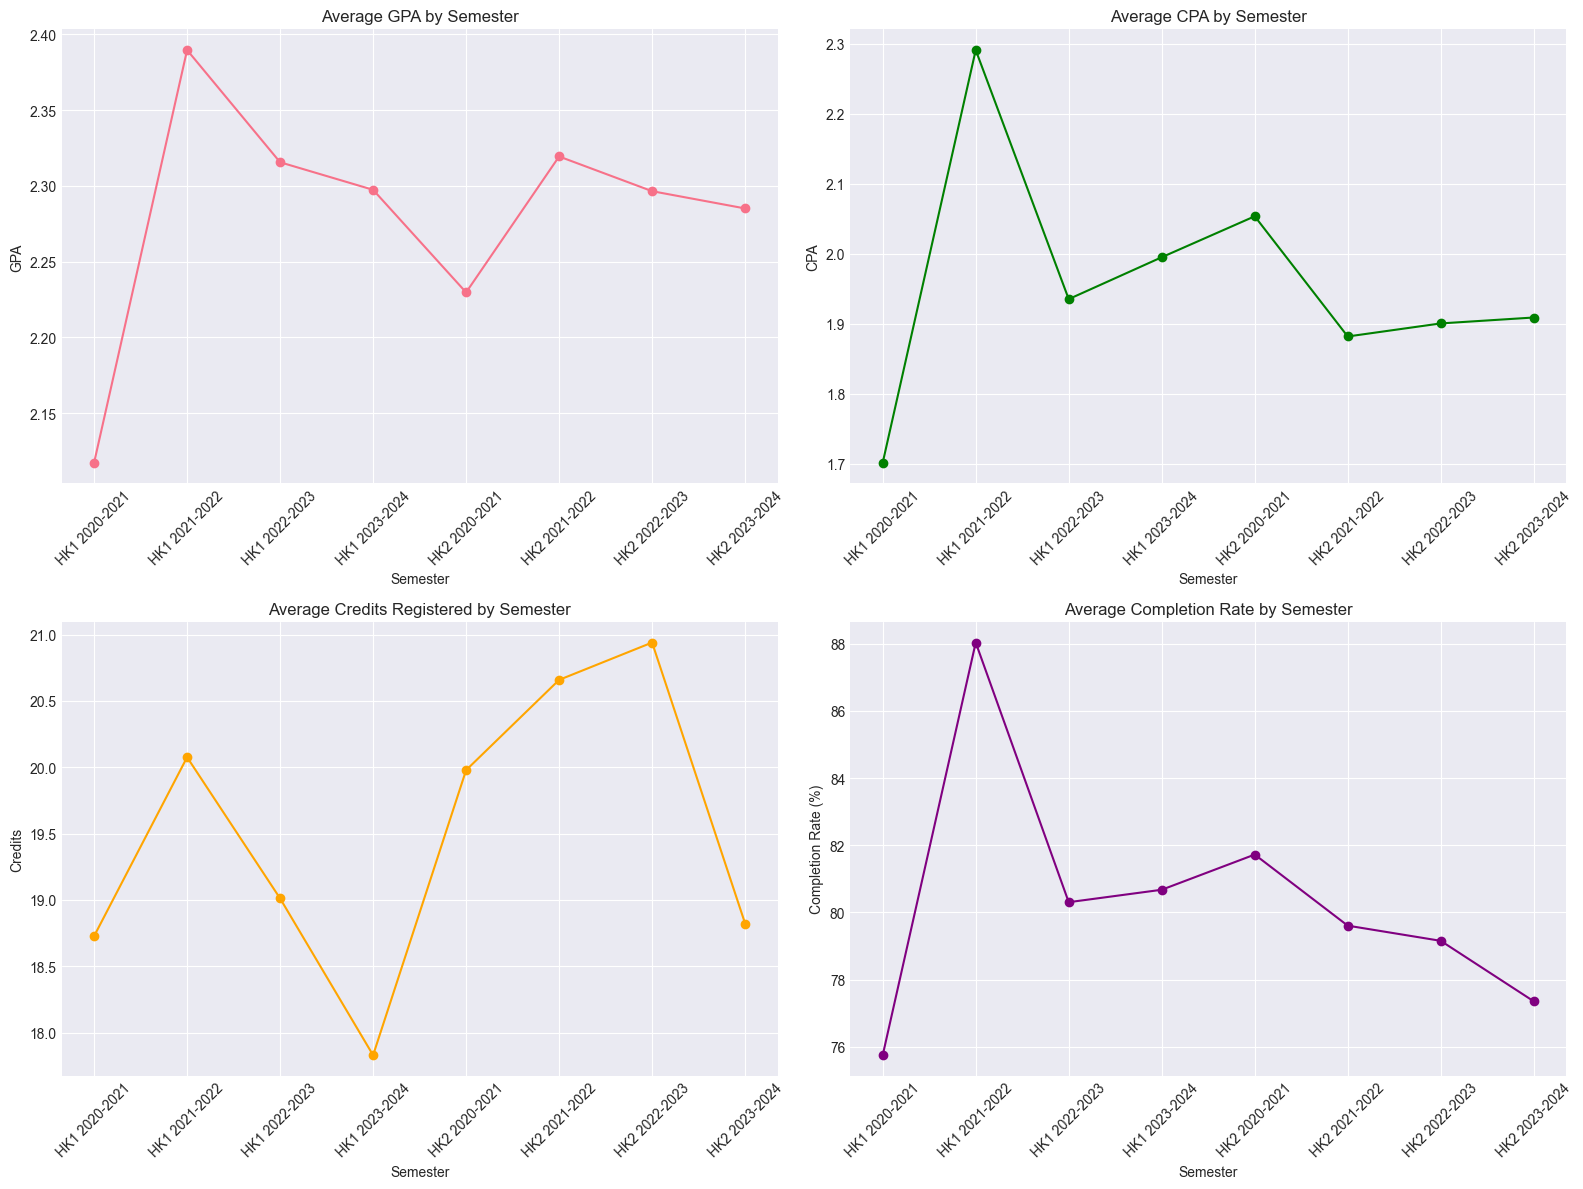

In [34]:
# Average metrics by semester
semester_stats = academic_df.groupby('HOC_KY').agg({
    'GPA': 'mean',
    'CPA': 'mean',
    'TC_DANGKY': 'mean',
    'TC_HOANTHANH': 'mean',
    'completion_rate': 'mean'
    }).reset_index()
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes[0, 0].plot(semester_stats['HOC_KY'], semester_stats['GPA'], marker='o')
axes[0, 0].set_title('Average GPA by Semester')
axes[0, 0].set_xlabel('Semester')
axes[0, 0].set_ylabel('GPA')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 1].plot(semester_stats['HOC_KY'], semester_stats['CPA'], marker='o', color='green')
axes[0, 1].set_title('Average CPA by Semester')
axes[0, 1].set_xlabel('Semester')
axes[0, 1].set_ylabel('CPA')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[1, 0].plot(semester_stats['HOC_KY'], semester_stats['TC_DANGKY'], marker='o', color='orange')
axes[1, 0].set_title('Average Credits Registered by Semester')
axes[1, 0].set_xlabel('Semester')
axes[1, 0].set_ylabel('Credits')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 1].plot(semester_stats['HOC_KY'], semester_stats['completion_rate'], marker='o', color='purple')
axes[1, 1].set_title('Average Completion Rate by Semester')
axes[1, 1].set_xlabel('Semester')
axes[1, 1].set_ylabel('Completion Rate (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

#### 11. Key Insights and Conclusions

##### Findings:
1. **Data Quality**
   - Add observations about data quality
   - Missing values patterns
2. **Student Performance**
   - Average GPA/CPA observations
   - Credit completion patterns
3. **Risk Factors**
   - Identified risk factors
   - Correlation insights
4. **Temporal Patterns**
    - Semester trends
    - Seasonal effects
##### Recommendations for Modeling:
1. Feature Engineering priorities
2. Handling missing values strategy
3. Potential feature interactions
4. Model selection considerations